In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import colormaps

In [3]:
file_path = 'credit_card_customers.csv'

df = pd.read_csv(file_path)

df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

# Preliminary Analysis and Data Cleaning

In [6]:
df.shape

(8950, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [12]:
df.isnull().sum()/df.shape[0]*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

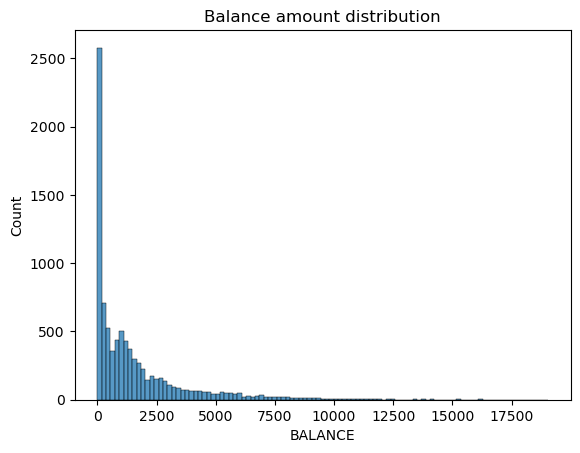

In [14]:
sns.histplot(data=df, x='BALANCE')
plt.title('Balance amount distribution')

plt.show()

Replacing MINIMUM_PAYMENTS feature missing values using categories obtained from BALANCE feature

In [16]:
prel_cat = df['BALANCE'].values
condlist = [
    (prel_cat <= 1000),
    (1000 < prel_cat) & (prel_cat <= 2000),
    (2000 < prel_cat) & (prel_cat <= 3000),
    (3000 < prel_cat) & (prel_cat <= 4000),
    (4000 < prel_cat) & (prel_cat <= 5000),
    (prel_cat > 5000)
]
choicelist = [1, 2, 3, 4, 5, 6]
df['Balance_categories'] = np.select(condlist, choicelist, default=df['BALANCE'].mean())

In [19]:
balance_categories_mean = df.groupby('Balance_categories')['MINIMUM_PAYMENTS'].mean().to_dict()
balance_categories_mean

{1.0: 248.8134718898193,
 2.0: 886.1409635301794,
 3.0: 1218.0094120012063,
 4.0: 1696.3443188551726,
 5.0: 2346.002134598131,
 6.0: 3266.2472178725925}

In [21]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['Balance_categories'].map(balance_categories_mean))

In [23]:
df.dropna(axis=0, inplace=True)

# EDA

In [26]:
labels_converter_balance = {0: 'Balance Cat. 1',
                      1: 'Balance Cat. 2',
                      2: 'Balance Cat. 3',
                      3: 'Balance Cat. 4',
                      4: 'Balance Cat. 5',
                      5: 'Balance Cat. 6'}

In [28]:
def create_legend_elements(labels_converter, cmap_name):
  palette = sns.color_palette(cmap_name, n_colors=len(labels_converter))
  return [
      plt.Line2D([0], [0], marker='o', color='w',
                 markerfacecolor=palette[i],
                markersize=10, label=label)
      for i, label in labels_converter.items()
  ]

Preliminary exploration of the features that bring most variance in the dataset.

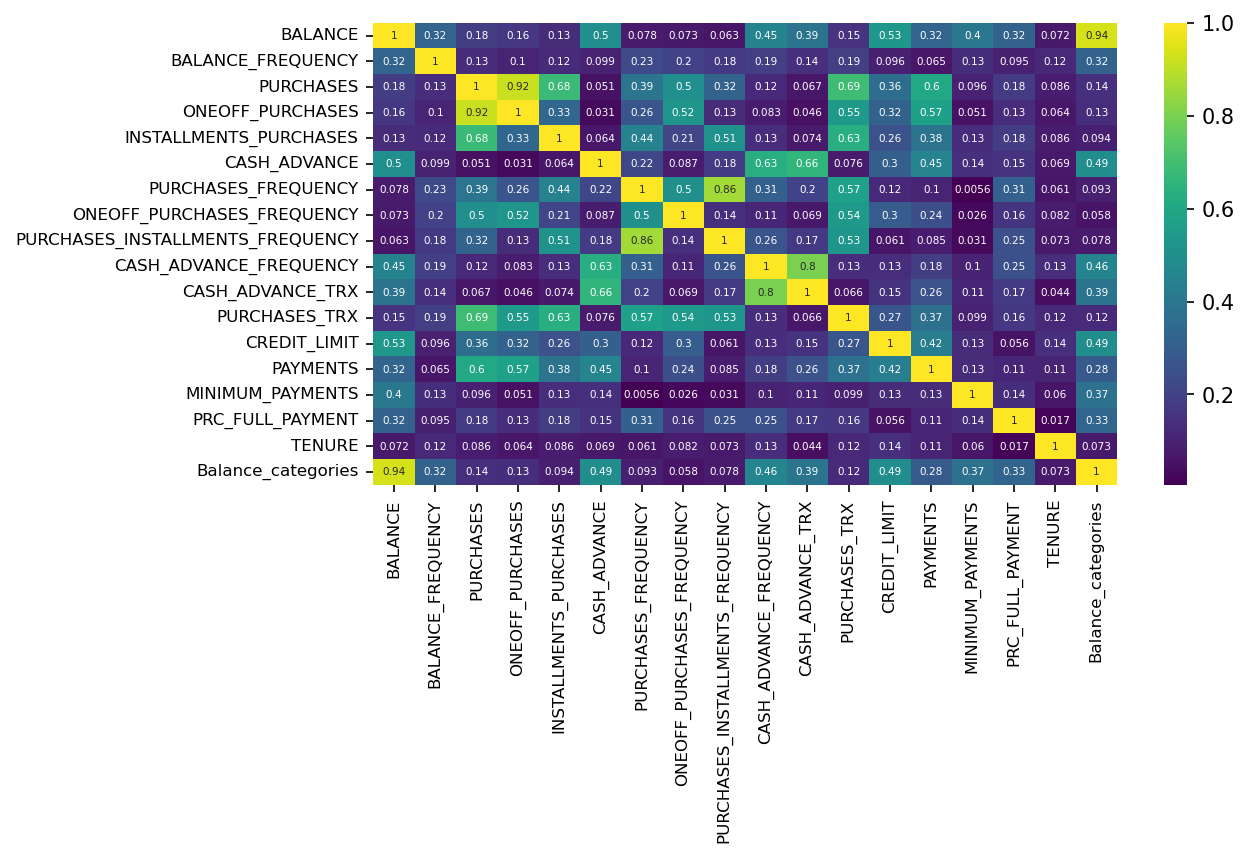

In [31]:
plt.figure(figsize=(8,4), dpi=150)
heatmap = sns.heatmap(np.abs(df.corr(numeric_only=True)), annot=True,
                      annot_kws={'size': 5}, cmap='viridis')
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=8);

In [32]:
var_normalized = np.round(df.var(numeric_only=True)/(df.var(numeric_only=True).sum()), 4)*100
var_normalized

BALANCE                              9.86
BALANCE_FREQUENCY                    0.00
PURCHASES                           10.39
ONEOFF_PURCHASES                     6.27
INSTALLMENTS_PURCHASES               1.86
CASH_ADVANCE                        10.01
PURCHASES_FREQUENCY                  0.00
ONEOFF_PURCHASES_FREQUENCY           0.00
PURCHASES_INSTALLMENTS_FREQUENCY     0.00
CASH_ADVANCE_FREQUENCY               0.00
CASH_ADVANCE_TRX                     0.00
PURCHASES_TRX                        0.00
CREDIT_LIMIT                        30.13
PAYMENTS                            19.07
MINIMUM_PAYMENTS                    12.40
PRC_FULL_PAYMENT                     0.00
TENURE                               0.00
Balance_categories                   0.00
dtype: float64

In [33]:
relevant_index = var_normalized[var_normalized>0].index
relevant_index

Index(['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'],
      dtype='object')

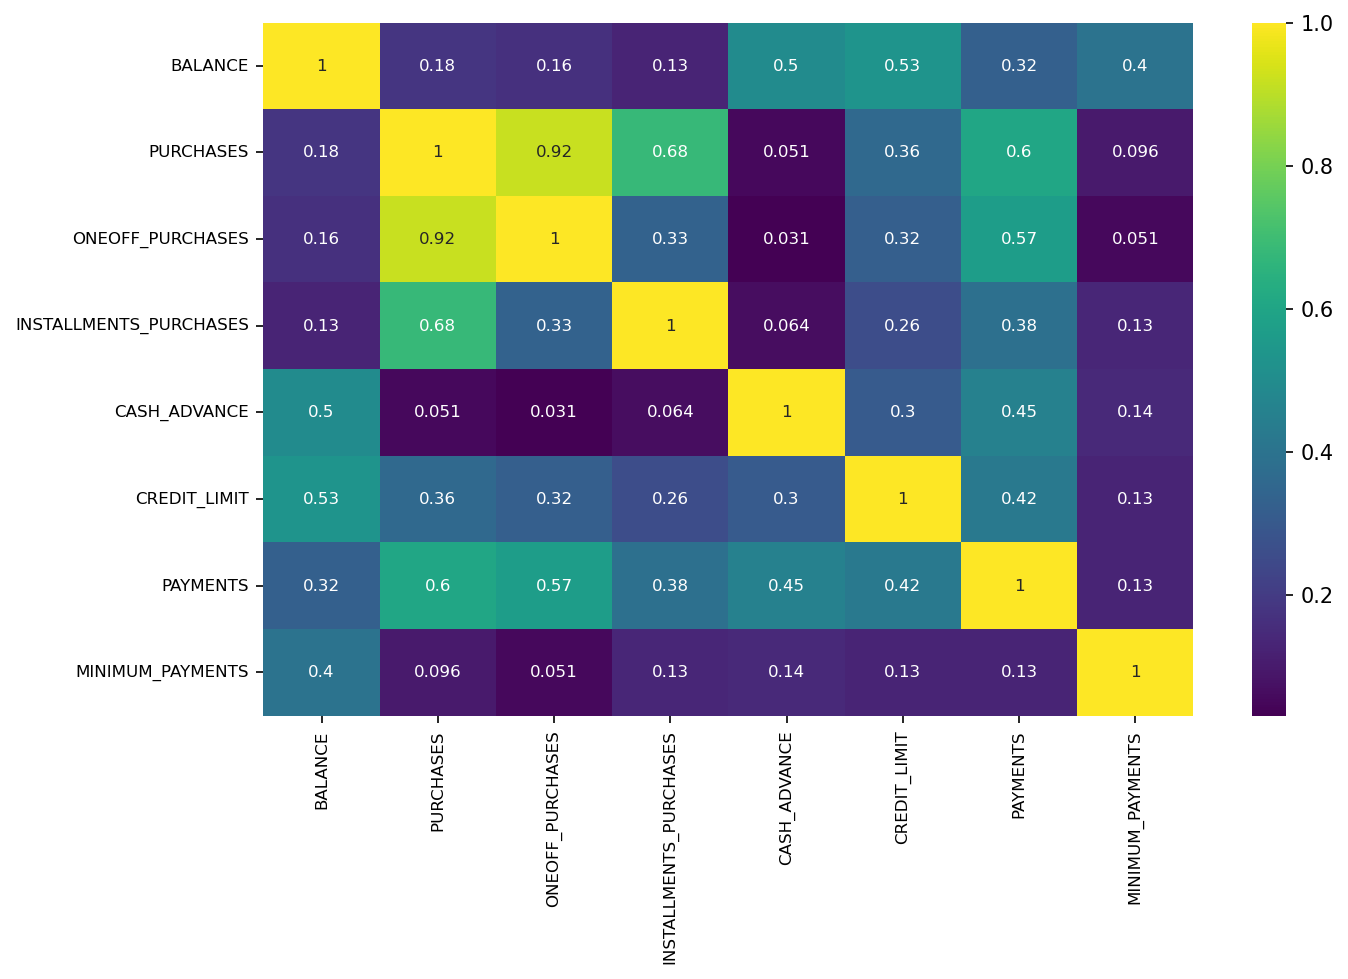

In [37]:
plt.figure(figsize=(10,6), dpi=150)
heatmap_2 = sns.heatmap(np.abs(df[relevant_index].corr(numeric_only=True)),
                        annot=True, annot_kws={'size': 8}, cmap='viridis')
heatmap_2.set_xticklabels(heatmap_2.get_xticklabels(), fontsize=8)
heatmap_2.set_yticklabels(heatmap_2.get_yticklabels(), fontsize=8);

Exploration, with table and scatterplot, of the feature pairs with the highest correlation in absolute value also using the preliminary subdivision into categories obtained from the Balance feature. Purpose: to try to find a first pattern of customer behavior

In [40]:
corr_matrix = df.drop('Balance_categories', axis=1).corr(numeric_only=True)
corr_pairs = corr_matrix.stack().reset_index()
corr_pairs.columns = ['Feature X', 'Feature Y', 'Correlation_Value']
corr_pairs = corr_pairs[corr_pairs['Feature X'] != corr_pairs['Feature Y']]
corr_pairs = corr_pairs.drop_duplicates(subset=['Correlation_Value'], keep='first')
corr_pairs['Abs_Value'] = corr_pairs['Correlation_Value'].abs()
corr_pairs = corr_pairs.sort_values(by='Abs_Value', ascending=False).reset_index(drop=True)
#corr_pairs = corr_pairs.sort_values(by='Valore_Correlazione', ascending=False).reset_index(drop=True)


In [42]:
corr_pairs_max = corr_pairs[corr_pairs['Abs_Value']>0.55]

In [44]:
corr_pairs_max

Feature X                         Feature Y  \
0                PURCHASES                  ONEOFF_PURCHASES   
1      PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
2   CASH_ADVANCE_FREQUENCY                  CASH_ADVANCE_TRX   
3                PURCHASES                     PURCHASES_TRX   
4                PURCHASES            INSTALLMENTS_PURCHASES   
5             CASH_ADVANCE                  CASH_ADVANCE_TRX   
6             CASH_ADVANCE            CASH_ADVANCE_FREQUENCY   
7   INSTALLMENTS_PURCHASES                     PURCHASES_TRX   
8                PURCHASES                          PAYMENTS   
9      PURCHASES_FREQUENCY                     PURCHASES_TRX   
10        ONEOFF_PURCHASES                          PAYMENTS   

    Correlation_Value  Abs_Value  
0            0.916844   0.916844  
1            0.862921   0.862921  
2            0.799573   0.799573  
3            0.689552   0.689552  
4            0.679889   0.679889  
5            0.656493   0.656493  
6            0.628535   0.628535  
7            0.628097   0.628097  
8            0.603252   0.603252  
9            0.568408   0.568408  
10           0.567283   0.567283

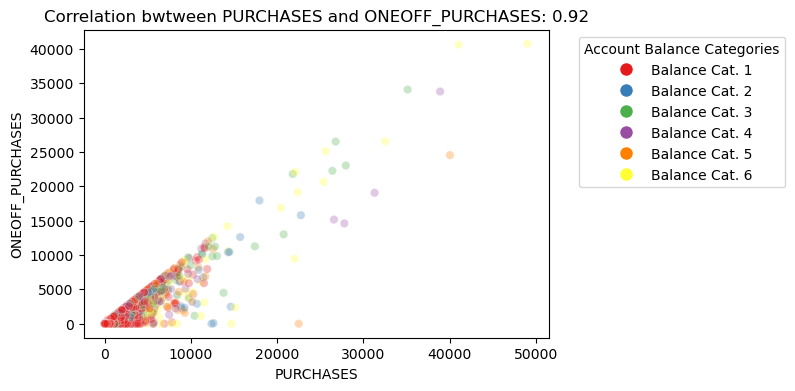

____________________________________________________________________________________________________


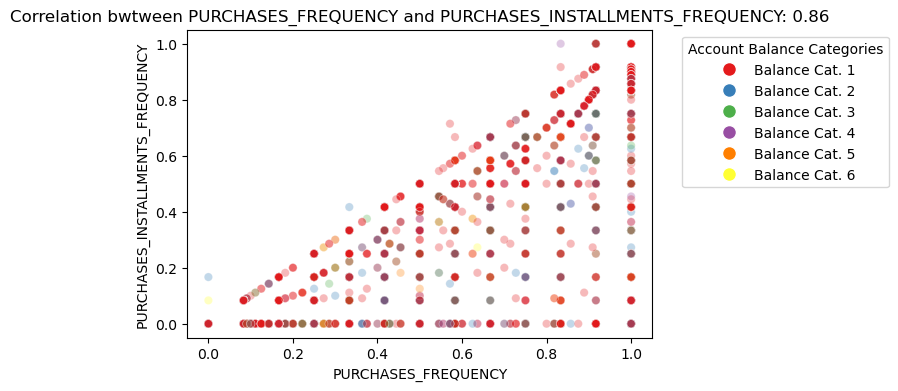

____________________________________________________________________________________________________


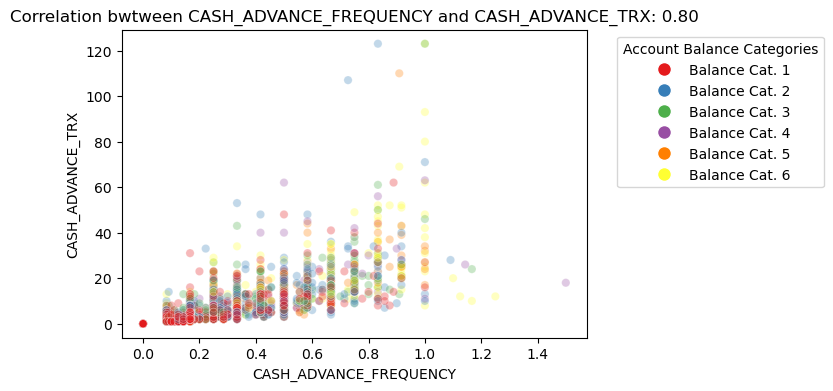

____________________________________________________________________________________________________


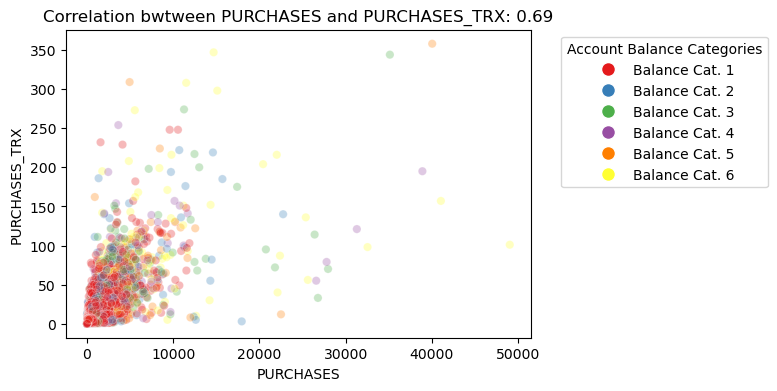

____________________________________________________________________________________________________


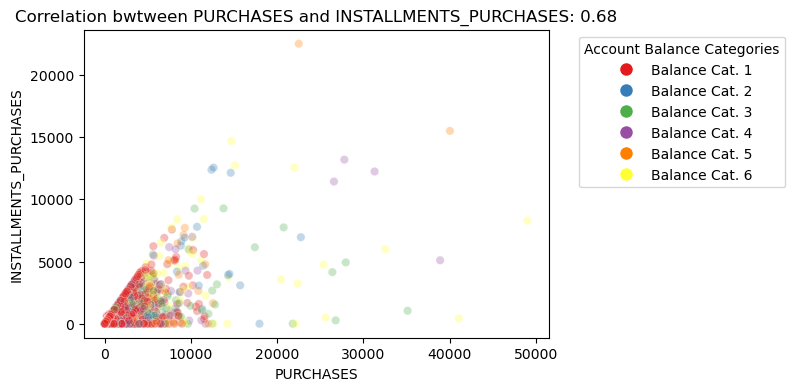

____________________________________________________________________________________________________


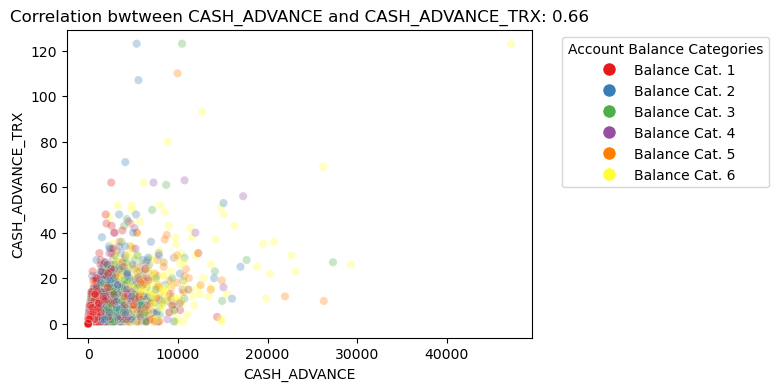

____________________________________________________________________________________________________


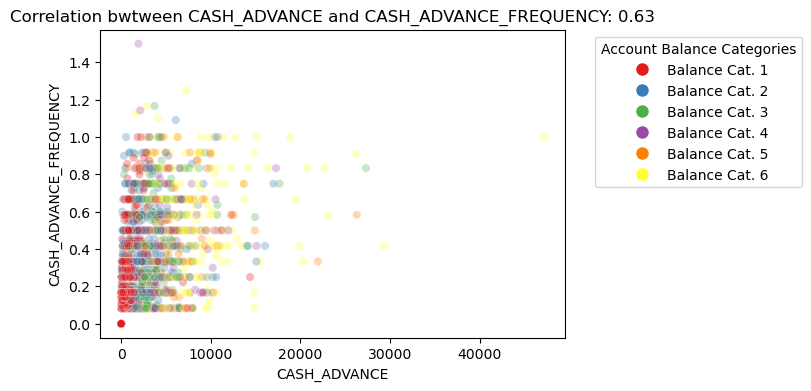

____________________________________________________________________________________________________


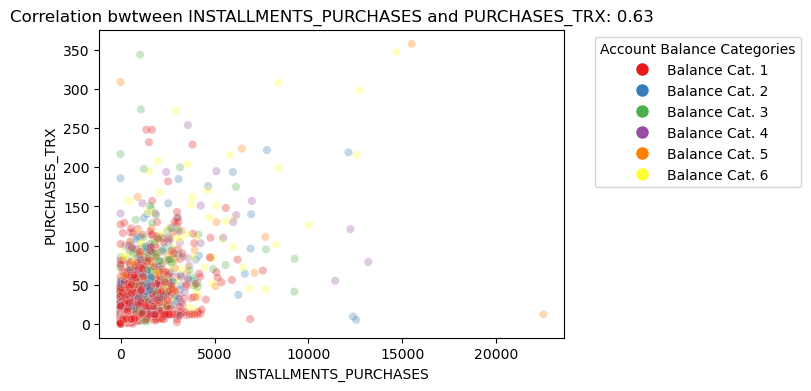

____________________________________________________________________________________________________


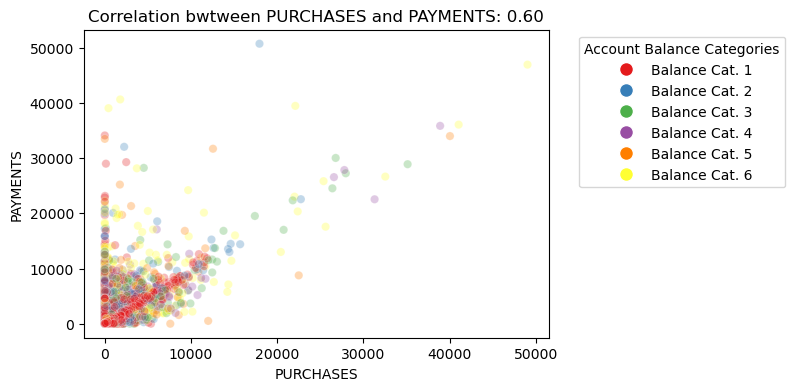

____________________________________________________________________________________________________


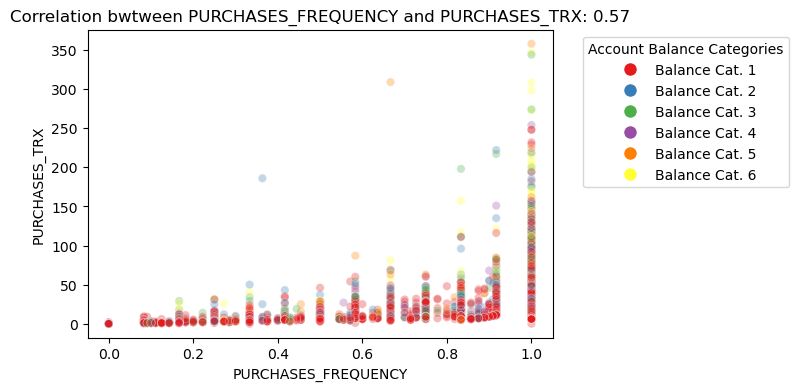

____________________________________________________________________________________________________


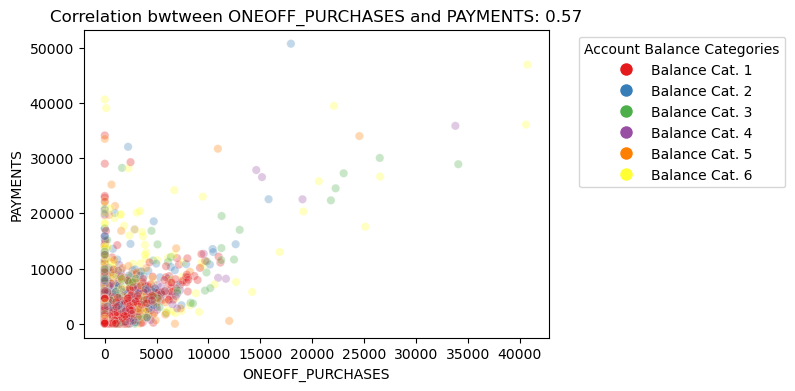

____________________________________________________________________________________________________


In [46]:
for x,y in zip(corr_pairs_max['Feature X'], corr_pairs_max['Feature Y']):
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=x, y=y, alpha=.3, hue='Balance_categories', palette='Set1')
    legend_elements = create_legend_elements(labels_converter_balance, 'Set1')
    plt.legend(title='Account Balance Categories', handles=legend_elements, bbox_to_anchor=(1.05, 1))
    plt.title(f'Correlation bwtween {x} and {y}: {df[x].corr(df[y]):.2f}')
    plt.show()
    print('____________________________________________________________________________________________________')


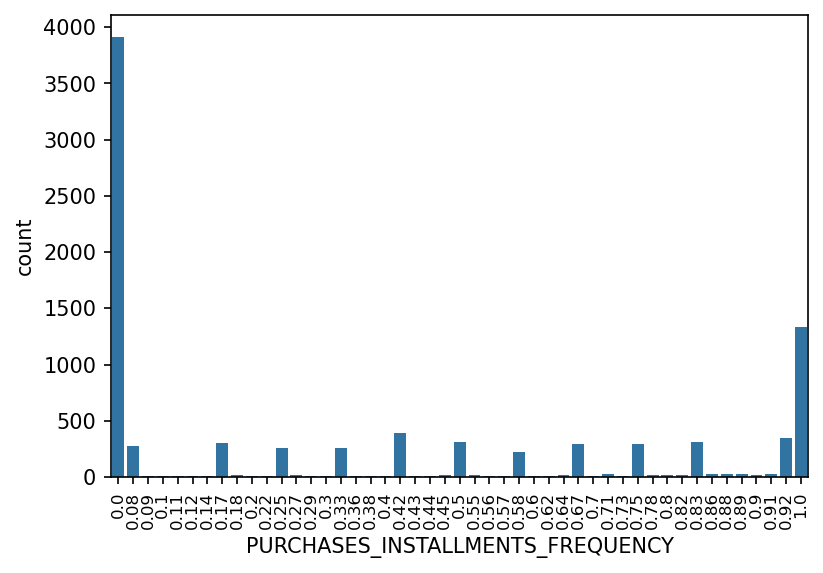

In [47]:
plt.figure(figsize=(6,4), dpi=150)
sns.countplot(data=df['PURCHASES_INSTALLMENTS_FREQUENCY'].round(2).to_frame(), x='PURCHASES_INSTALLMENTS_FREQUENCY')
plt.xticks(rotation=90, fontsize=8);

In [48]:
acq_rate = df[df['PURCHASES_FREQUENCY']>0.20]['CUST_ID'].count()/df.shape[0]*100
print(f'Percentage of customers who purchase more frequently than 20%: {acq_rate:.2f}% ')

Percentage of customers who purchase more frequently than 20%: 63.21% 


In [49]:
acq_rate = df[df['PURCHASES_INSTALLMENTS_FREQUENCY']>0.20]['CUST_ID'].count()/df.shape[0]*100
print(f'Percentage of customers who purchased in installments more frequently than 20%: {acq_rate:.2f}% ')

Percentage of customers who purchased in installments more frequently than 20%: 49.10% 


In [50]:
acq_uniq = df[df['ONEOFF_PURCHASES_FREQUENCY']<0.80]['CUST_ID'].count()/df.shape[0]*100
acq_uniq
print(f"Percentage of customers who made a one-time purchase less than 80% of the time: {acq_uniq:.2f}% ")

Percentage of customers who made a one-time purchase less than 80% of the time: 91.28% 


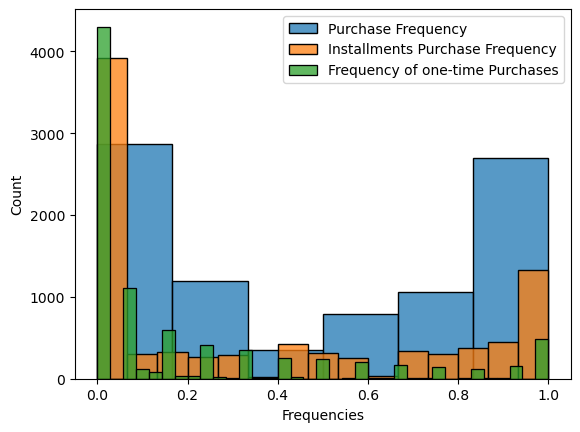

In [51]:
sns.histplot(data=df, x='PURCHASES_FREQUENCY', bins=6, label='Purchase Frequency')
sns.histplot(data=df, x='PURCHASES_INSTALLMENTS_FREQUENCY', label='Installments Purchase Frequency')
sns.histplot(data=df, x='ONEOFF_PURCHASES_FREQUENCY', label='Frequency of one-time Purchases')
plt.xlabel('Frequencies')
plt.legend()

plt.show()

From the brief analysis above we can say that customers in general carry out operations in various ways evidently improvable.  
There is room fo different campaigns that, if properly set, can bring additional revenue.

### PCA Preliminary Analysis  
Data analysis using PCA to understand customer behavior through features compression also using Balance categories subdivision previously created.

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop('CUST_ID', axis=1))

In [56]:
from sklearn.decomposition import PCA

In [58]:
pca_3 = PCA(n_components=3)
prinipal_componnts_3 = pca_3.fit_transform(scaled_df)

In [64]:
pca_3.explained_variance_ratio_

array([0.26151958, 0.22393927, 0.08636377])

In [67]:
np.sum(pca_3.explained_variance_ratio_)

np.float64(0.5718226150474853)

In [70]:
from mpl_toolkits import mplot3d

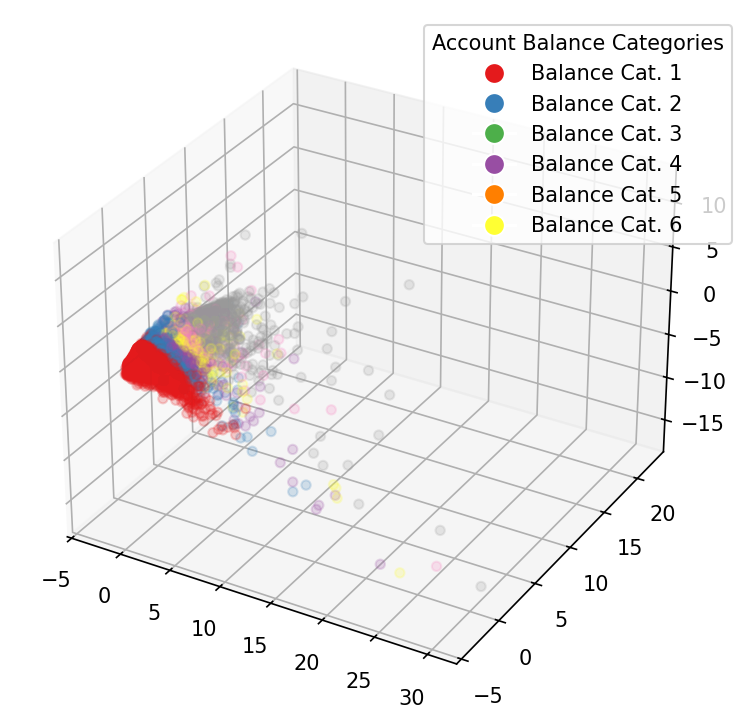

In [74]:
plt.figure(figsize=(6,6), dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(prinipal_componnts_3[:,0],
             prinipal_componnts_3[:,1],
             prinipal_componnts_3[:,2],
             alpha=.2, c=df['Balance_categories'],
             cmap='Set1')
legend_elements = create_legend_elements(labels_converter_balance, 'Set1')
plt.legend(title='Account Balance Categories', bbox_to_anchor=(1.05, 1), handles=legend_elements)

In [75]:
pca_2 = PCA(n_components=2)
prinipal_componnts_2 = pca_2.fit_transform(scaled_df)

In [76]:
pca_2.explained_variance_ratio_

array([0.26151958, 0.22393927])

In [77]:
np.sum(pca_2.explained_variance_ratio_)

np.float64(0.48545884865098765)

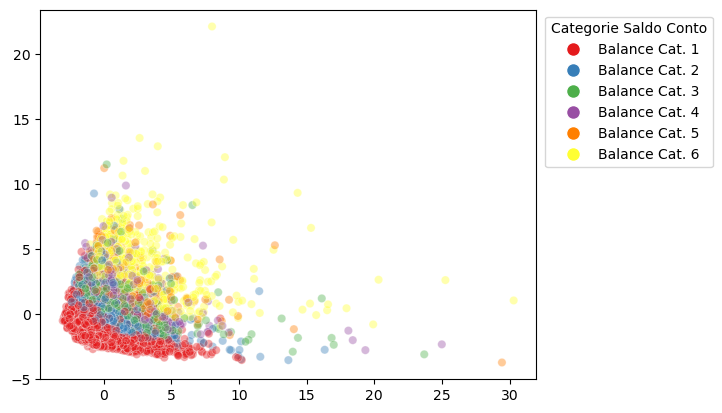

In [82]:
sns.scatterplot(data=df,
                x=prinipal_componnts_2[:,0],
                y=prinipal_componnts_2[:,1],
                alpha=.4, hue='Balance_categories', palette='Set1')
legend_elements = create_legend_elements(labels_converter_balance, 'Set1')
plt.legend(title='Categorie Saldo Conto', bbox_to_anchor=(1.37, 1), handles=legend_elements)


As is shown above PCA analysis with 2 and 3 principal components explains half of total variance and we can see potential patterns to explore from the graphs.

# Segmentation with K-Means clustering

In [86]:
from sklearn.cluster import KMeans

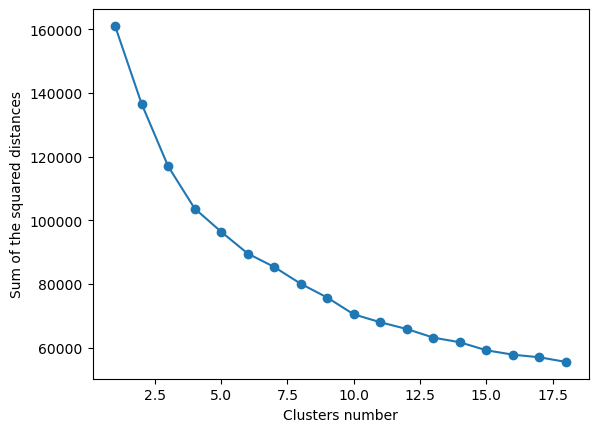

In [88]:
ssd = {}
for k in range(1, 19):
    kmeans = KMeans(init="k-means++", n_clusters=k, random_state=101).fit(scaled_df)
    ssd[k] = kmeans.inertia_
plt.figure()
plt.plot(list(ssd.keys()), list(ssd.values()),marker='o')
plt.xlabel("Clusters number")
plt.ylabel("Sum of the squared distances")
plt.show()

<Axes: >

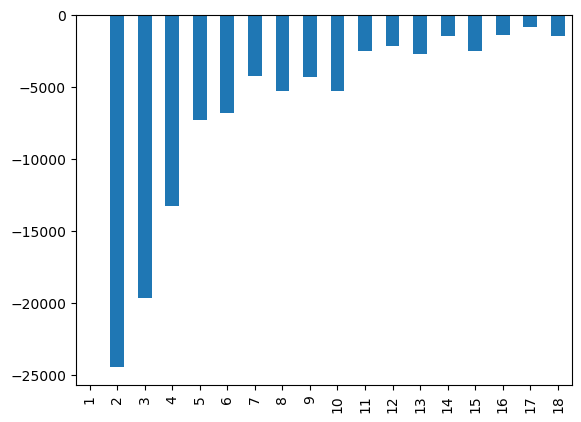

In [90]:
pd.Series(ssd).diff().plot(kind='bar')

From the Clòusters preliminary analysis above we can see that 6 is the optimal number of clusters to identify customers.

In [93]:
final_model = KMeans(init="k-means++", n_clusters=6, random_state=101).fit(scaled_df)

# Clusters review

In [96]:
labels_converter_clusters = {0: 'Cluster 1',
                    1: 'Cluster 2',
                    2: 'Cluster 3',
                    3: 'Cluster 4',
                    4: 'Cluster 5',
                    5: 'Cluster 6'}

In [98]:
clustered_df = df.copy()
clustered_df['Clusters'] = final_model.labels_
clustered_df = clustered_df.drop(['Balance_categories', 'CUST_ID'], axis=1)

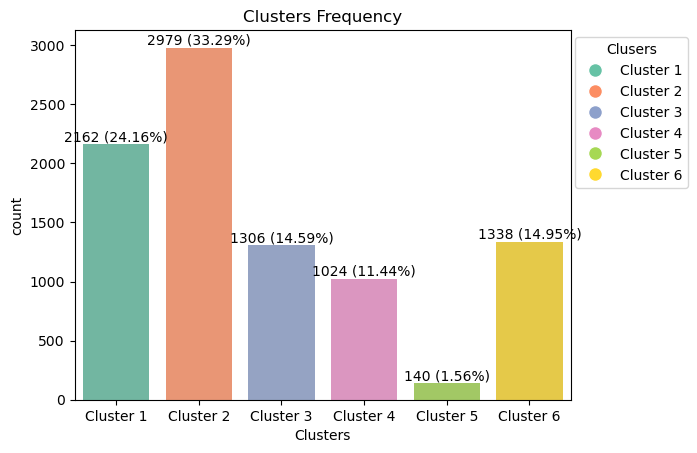

In [100]:
ax = sns.countplot(data=clustered_df, x='Clusters', hue='Clusters', palette='Set2')
ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels([labels_converter_clusters.get(tick) for tick in ticks])
legend_elements = create_legend_elements(labels_converter_clusters, 'Set2')
plt.legend(title='Clusers', handles=legend_elements, bbox_to_anchor=(1.25,1))
plt.title(f'Clusters Frequency')

for container in ax.containers:
    ax.bar_label(container, labels=[f'{val:.0f} ({val*100/len(clustered_df):.2f}%)' for val in container.datavalues])

plt.show()

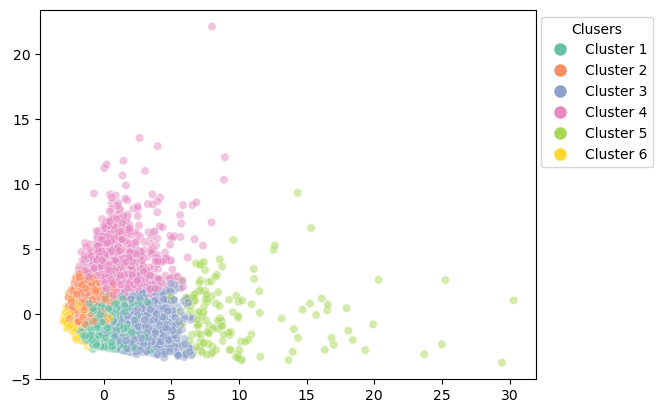

In [102]:
sns.scatterplot(data=clustered_df,
                x=prinipal_componnts_2[:,0],
                y=prinipal_componnts_2[:,1],
                alpha=.5, hue='Clusters', palette='Set2')
legend_elements = create_legend_elements(labels_converter_clusters, 'Set2')
plt.legend(title='Clusers', handles=legend_elements, bbox_to_anchor=(1.25,1))

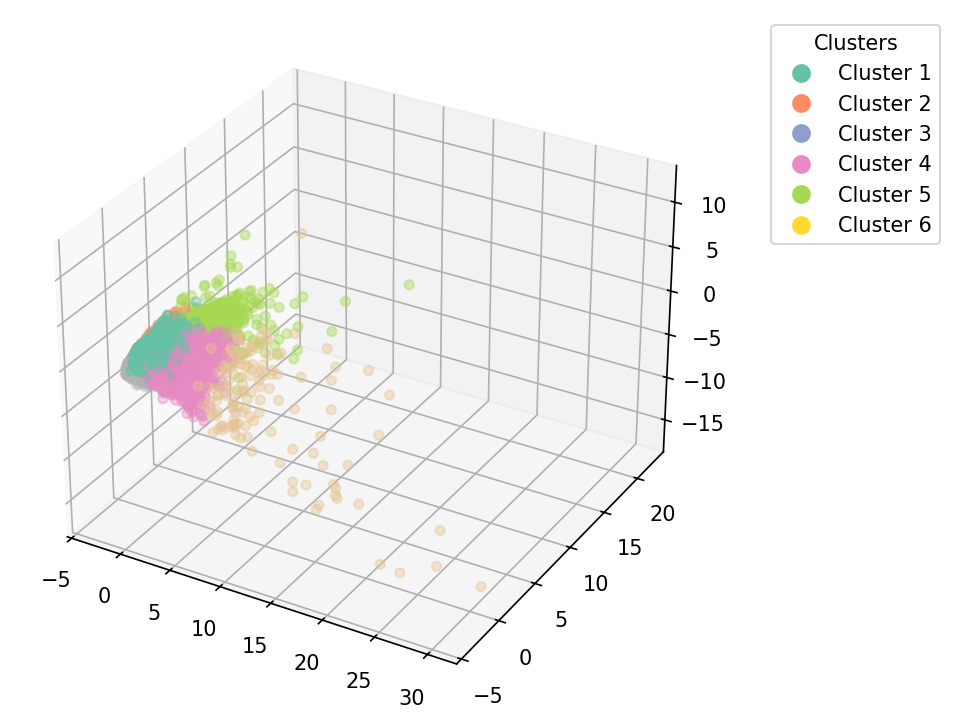

In [104]:
plt.figure(figsize=(6,6), dpi=150)
ax = plt.axes(projection='3d')
sc = ax.scatter3D(prinipal_componnts_3[:,0],
             prinipal_componnts_3[:,1],
             prinipal_componnts_3[:,2],
             alpha=.4, c=final_model.labels_, cmap='Set2')
legend_elements = create_legend_elements(labels_converter_clusters, 'Set2')
plt.legend(title='Clusters', handles=legend_elements, bbox_to_anchor=(1.35,1))
plt.show()

As the PCA above shows, the clusters are well divided and identifiable with both 3 principal-components and 2, a symbol of the fact that the identified clusters divide well the customers with homogeneous behaviors.

In [51]:
db_statistics = np.round(clustered_df.groupby(by='Clusters').describe().T, 2)
db_statistics.columns = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']
db_statistics = db_statistics[db_statistics.index.get_level_values(1) != 'count']

with pd.option_context('display.max_rows', None,):
    display(db_statistics)

Cluster 1  Cluster 2  Cluster 3  \
BALANCE                          mean     630.19    1423.01    1548.92   
                                 std      827.65    1030.72    1711.60   
                                 min        0.73       0.49       1.20   
                                 25%       59.74     676.70     273.83   
                                 50%      230.97    1203.46     866.10   
                                 75%      997.61    1914.64    2363.28   
                                 max     5860.43    5850.17   10599.44   
BALANCE_FREQUENCY                mean       0.95       0.97       0.98   
                                 std        0.11       0.08       0.07   
                                 min        0.27       0.45       0.18   
                                 25%        1.00       1.00       1.00   
                                 50%        1.00       1.00       1.00   
                                 75%        1.00       1.00       1.00   
                                 max        1.00       1.00       1.00   
PURCHASES                        mean     855.54     252.96    2705.30   
                                 std      733.20     449.32    1747.93   
                                 min       12.00       0.00       8.40   
                                 25%      341.46       0.00    1370.96   
                                 50%      610.40      45.45    2349.47   
                                 75%     1162.78     326.69    3656.93   
                                 max     6897.56    4900.00    9661.37   
ONEOFF_PURCHASES                 mean     171.84     208.98    1919.43   
                                 std      346.86     421.08    1511.18   
                                 min        0.00       0.00       0.00   
                                 25%        0.00       0.00     837.90   
                                 50%        0.00       0.00    1523.32   
                                 75%      187.76     224.36    2511.66   
                                 max     3227.85    4900.00    9661.37   
INSTALLMENTS_PURCHASES           mean     684.25      44.14     786.33   
                                 std      622.93     136.92     897.93   
                                 min        9.65       0.00       0.00   
                                 25%      280.88       0.00      70.62   
                                 50%      489.32       0.00     492.24   
                                 75%      865.03       0.00    1189.23   
                                 max     6897.56    3000.00    6271.02   
CASH_ADVANCE                     mean     183.96     864.95     302.18   
                                 std      571.40    1130.88     798.67   
                                 min        0.00       0.00       0.00   
                                 25%        0.00       0.00       0.00   
                                 50%        0.00     377.34       0.00   
                                 75%        0.00    1358.04      61.18   
                                 max     7663.91    7155.61    7894.58   
PURCHASES_FREQUENCY              mean       0.88       0.15       0.92   
                                 std        0.16       0.20       0.13   
                                 min        0.27       0.00       0.25   
                                 25%        0.75       0.00       0.90   
                                 50%        1.00       0.08       1.00   
                                 75%        1.00       0.25       1.00   
                                 max        1.00       0.92       1.00   
ONEOFF_PURCHASES_FREQUENCY       mean       0.08       0.10       0.75   
                                 std        0.14       0.15       0.24   
                                 min        0.00       0.00       0.00   
                                 25%        0.00       0.00       0.58   
                                 50%       

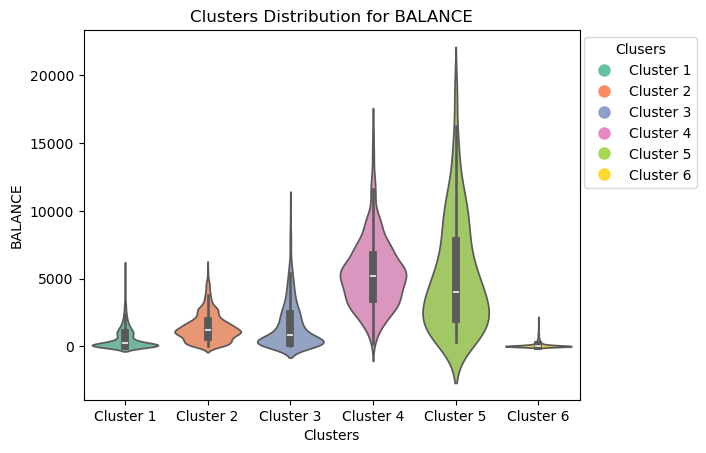

______________________________________________________________


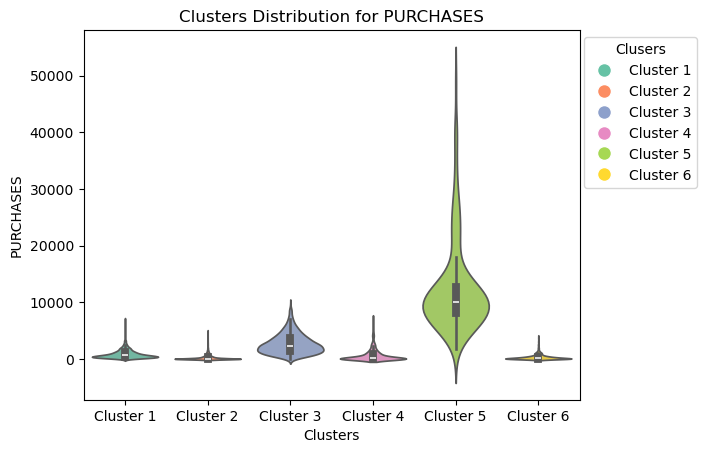

______________________________________________________________


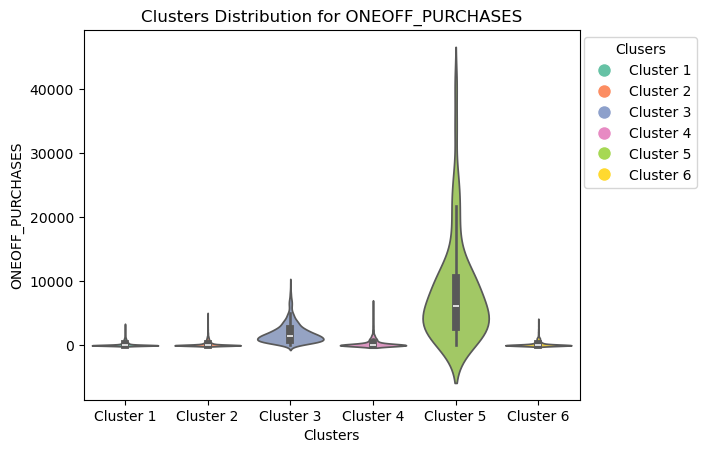

______________________________________________________________


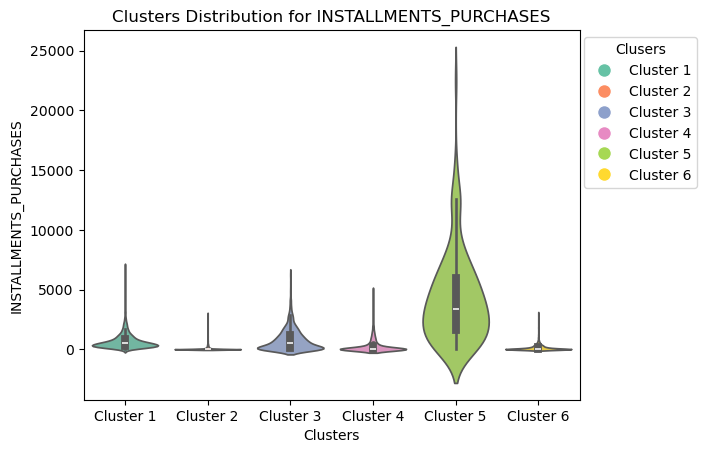

______________________________________________________________


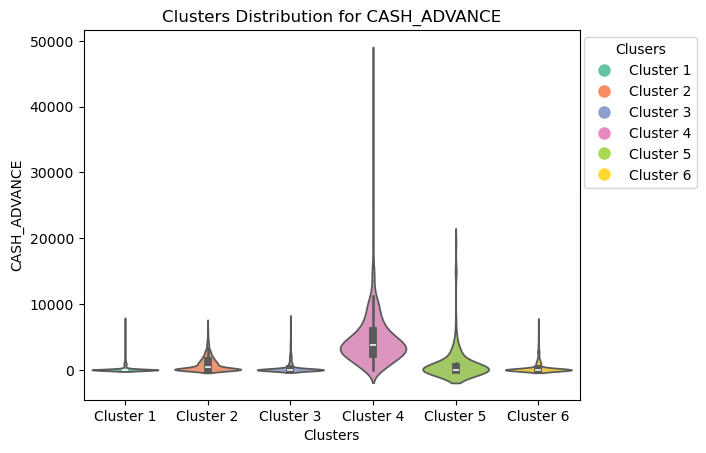

______________________________________________________________


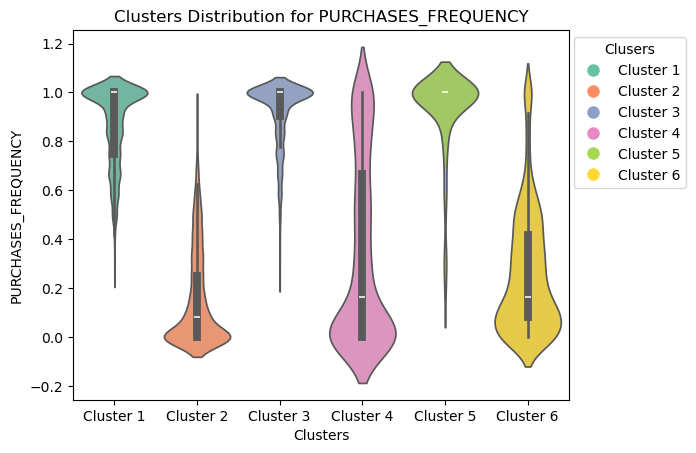

______________________________________________________________


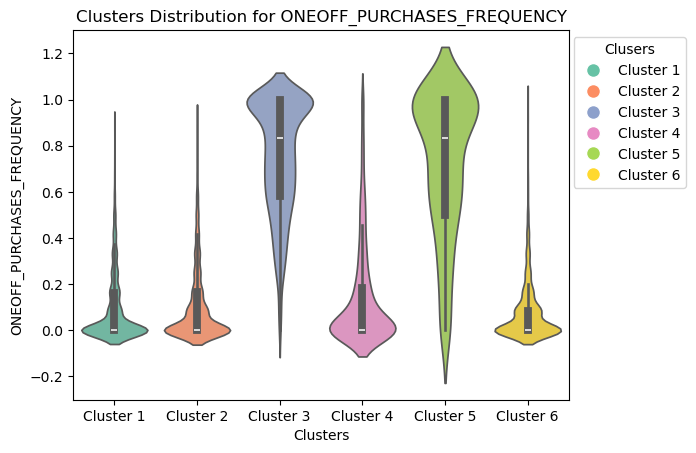

______________________________________________________________


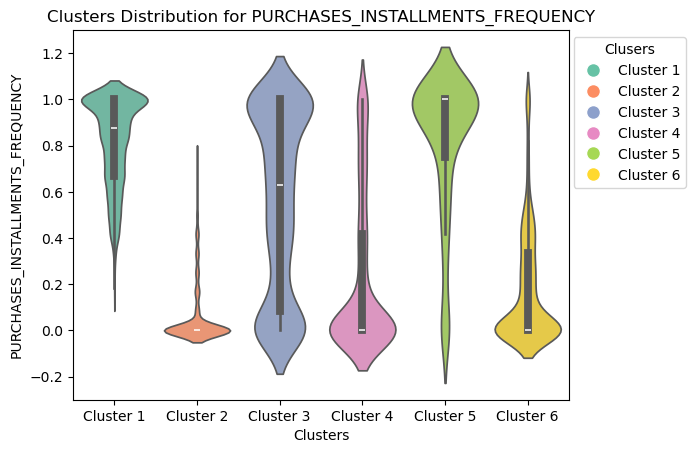

______________________________________________________________


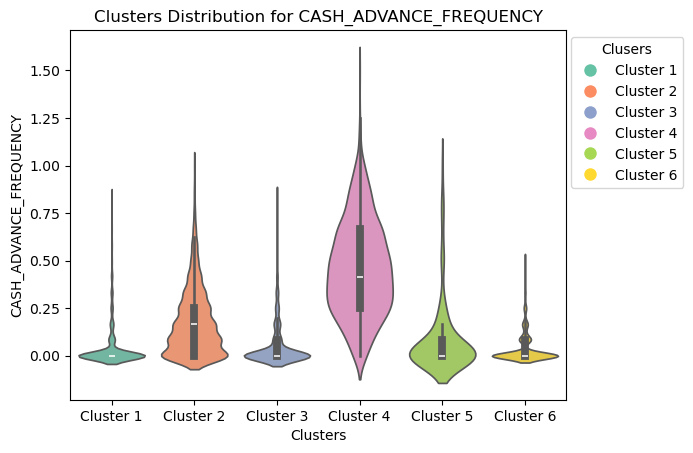

______________________________________________________________


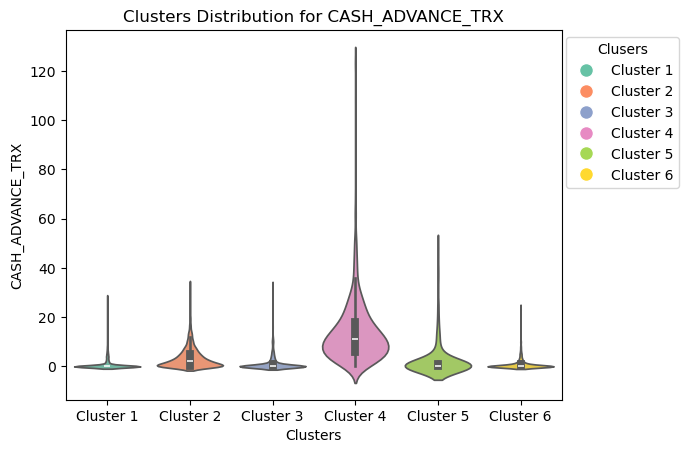

______________________________________________________________


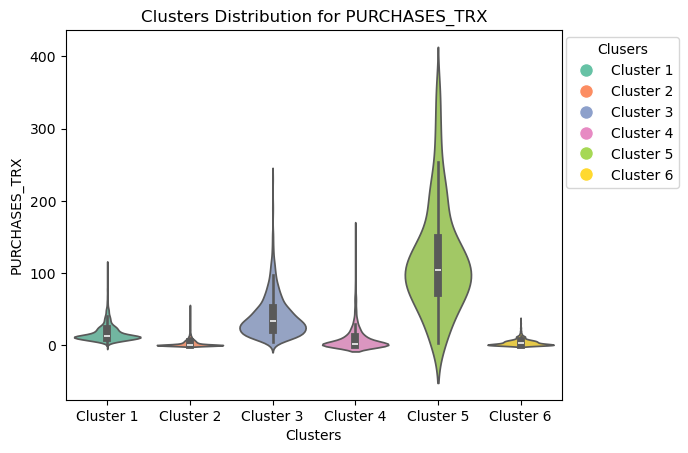

______________________________________________________________


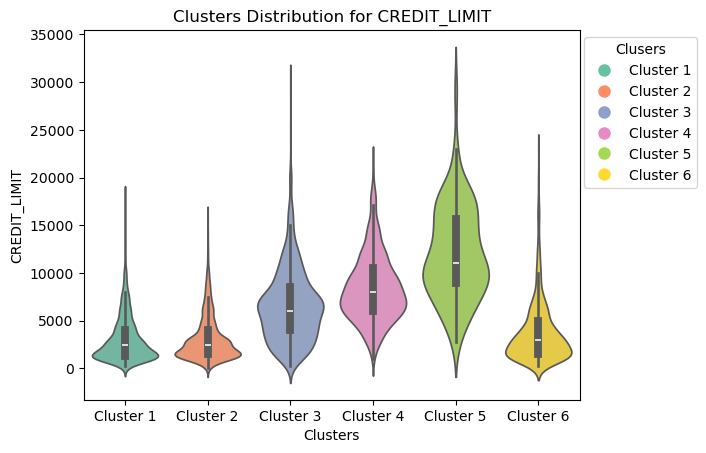

______________________________________________________________


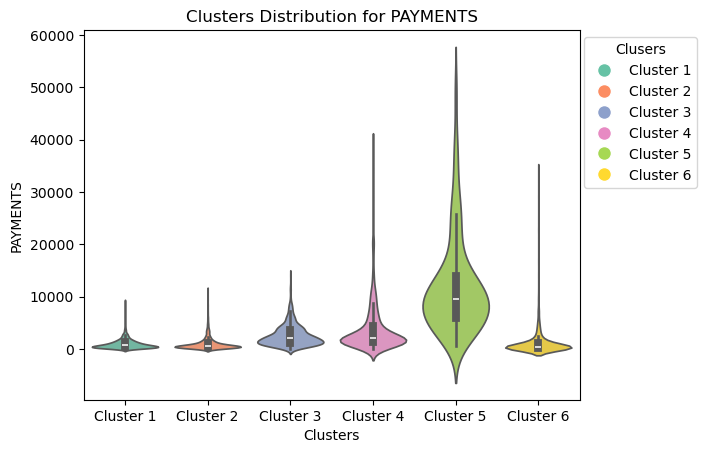

______________________________________________________________


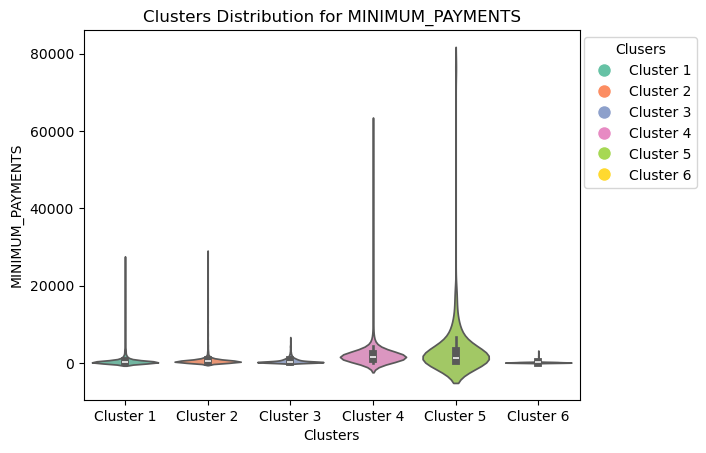

______________________________________________________________


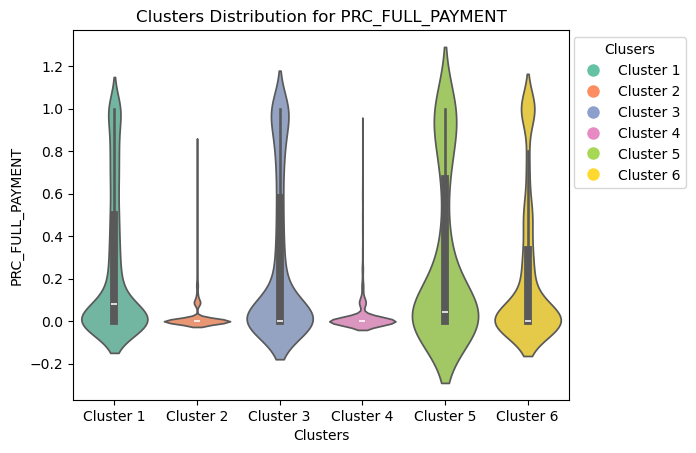

______________________________________________________________


In [107]:
columns_to_plot = ['BALANCE', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
for col in columns_to_plot:
  #plt.figure(figsize=(8,6), dpi=200)
  ax = sns.violinplot(data=clustered_df, y=col, x='Clusters', hue='Clusters', palette='Set2')
  ticks = ax.get_xticks()
  ax.set_xticks(ticks)
  ax.set_xticklabels([labels_converter_clusters.get(tick) for tick in ticks])
  legend_elements = create_legend_elements(labels_converter_clusters, 'Set2')
  plt.legend(title='Clusers', handles=legend_elements, bbox_to_anchor=(1.25,1))
  plt.title(f'Clusters Distribution for {col}')
  plt.show()
  print('______________________________________________________________')

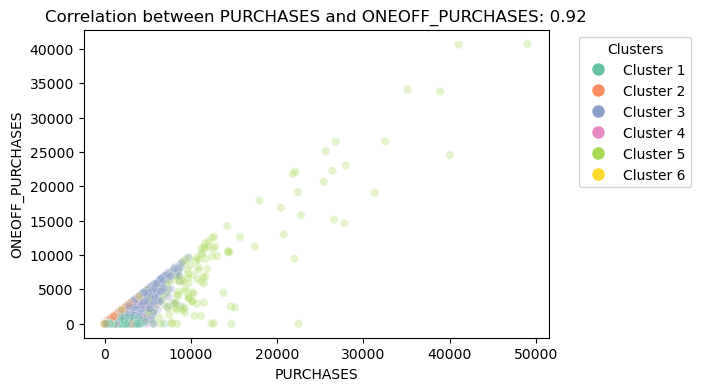

______________________________________________________________


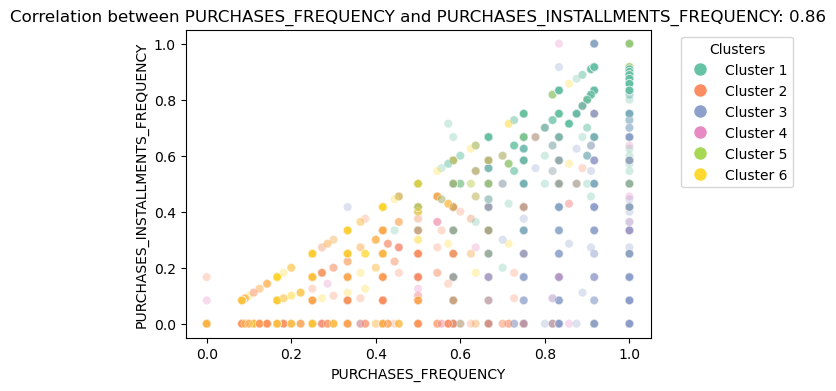

______________________________________________________________


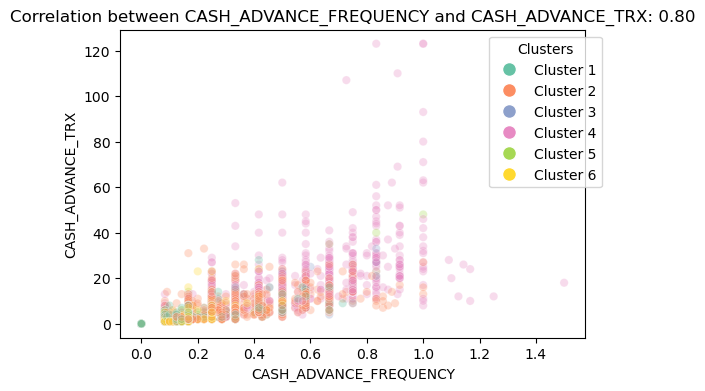

______________________________________________________________


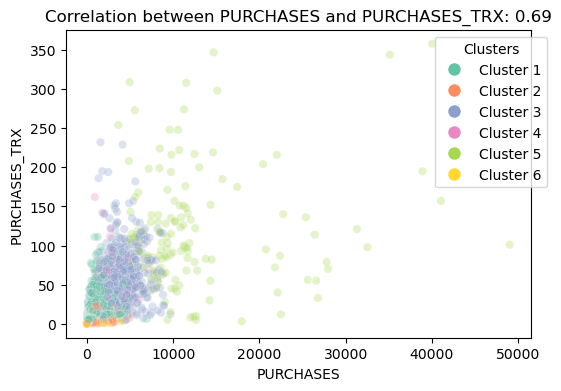

______________________________________________________________


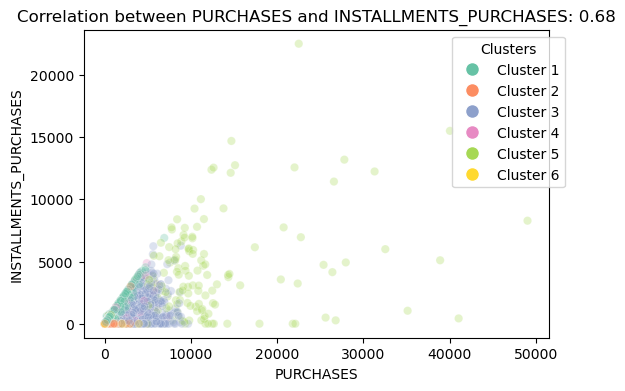

______________________________________________________________


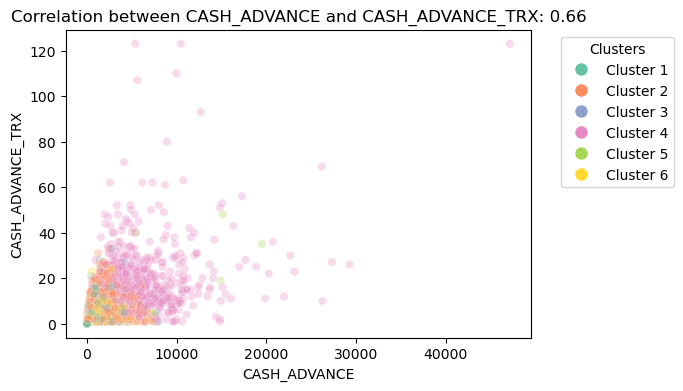

______________________________________________________________


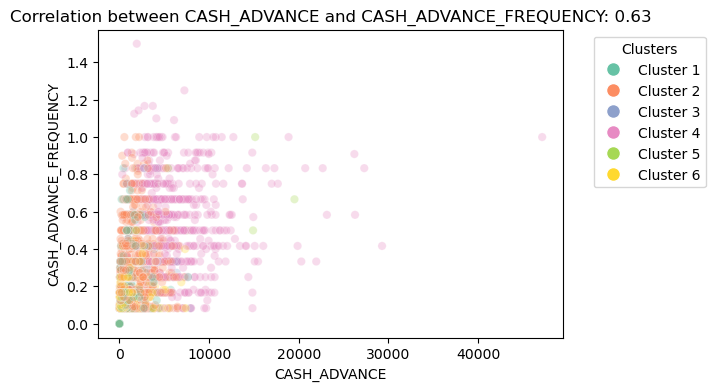

______________________________________________________________


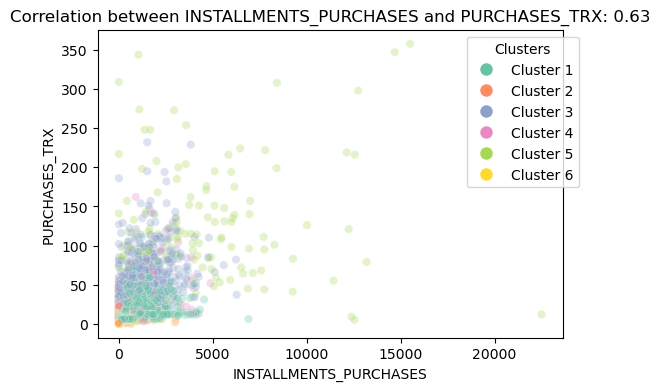

______________________________________________________________


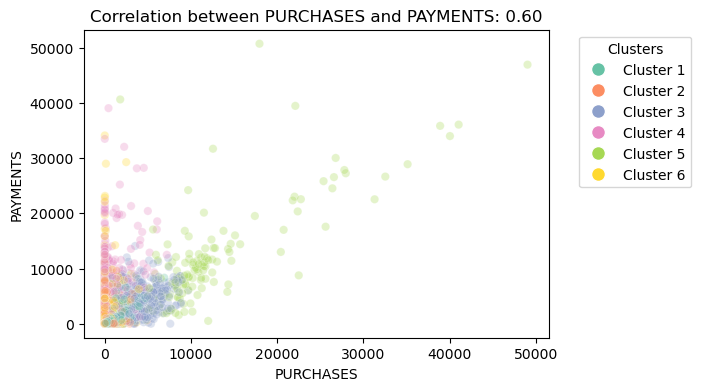

______________________________________________________________


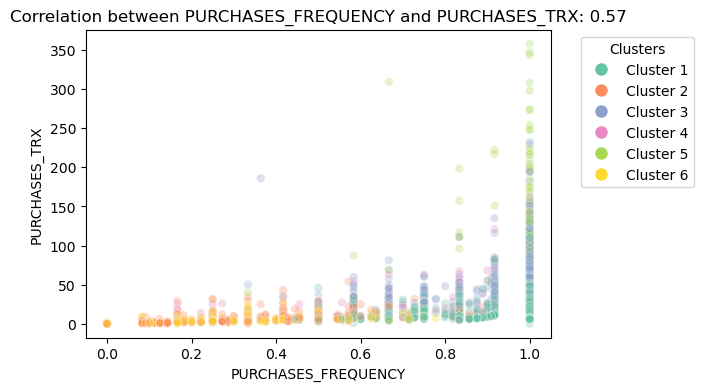

______________________________________________________________


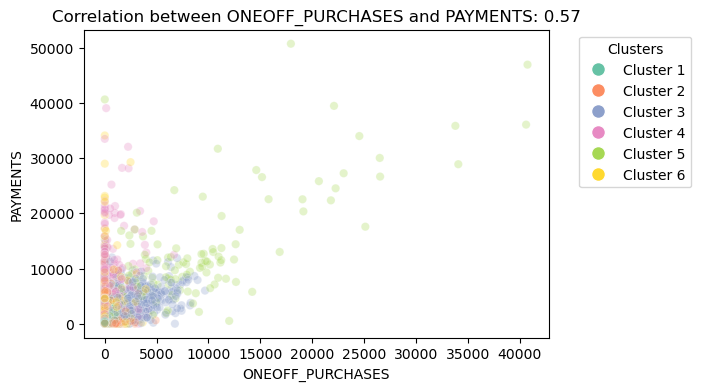

______________________________________________________________


In [111]:
for x,y in zip(corr_pairs_max['Feature X'], corr_pairs_max['Feature Y']):
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=clustered_df, x=x, y=y, alpha=.3, hue='Clusters', palette='Set2')
    legend_elements = create_legend_elements(labels_converter_clusters, 'Set2')
    plt.legend(title='Clusters', handles=legend_elements, bbox_to_anchor=(1.05, 1))
    plt.title(f'Correlation between {x} and {y}: {df[x].corr(df[y]):.2f}')
    plt.show()
    print('______________________________________________________________')

# Sviluppo delle Strategie di Marketing

In [54]:
df_medie = clustered_df.groupby(by='Clusters').mean()
df_medie.index = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']
df_medie

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
Cluster 1   630.185524           0.949287    855.537303        171.844043   
Cluster 2  1423.012690           0.965220    252.961584        208.983437   
Cluster 3  1548.917047           0.977649   2705.304946       1919.429602   
Cluster 4  5362.075907           0.976343    632.668457        363.191260   
Cluster 5  5209.070645           0.981753  12463.403786       8187.386214   
Cluster 6   117.708608           0.380887    336.010284        211.740665   

           INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster 1              684.245194    183.957553             0.877702   
Cluster 2               44.144270    864.950235             0.154909   
Cluster 3              786.334763    302.179081             0.920512   
Cluster 4              269.576484   4672.189717             0.335310   
Cluster 5             4276.017571    942.373924             0.933214   
Cluster 6              124.491442    355.311005             0.264108   

           ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster 1                    0.084260                          0.819821   
Cluster 2                    0.098225                          0.058677   
Cluster 3                    0.752365                          0.553703   
Cluster 4                    0.144661                          0.234846   
Cluster 5                    0.721136                          0.812803   
Cluster 6                    0.078875                          0.177168   

           CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
Cluster 1                0.039368          0.760407      17.573543   
Cluster 2                0.175090          3.442766       2.920443   
Cluster 3                0.053367          1.067381      40.506891   
Cluster 4                0.458486         13.994141       9.616211   
Cluster 5                0.087500          2.678571     119.242857   
Cluster 6                0.038288          0.804933       4.122571   

           CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
Cluster 1   3183.473729    982.965334        630.458702          0.263629   
Cluster 2   3150.425199    995.740543        711.827227          0.023839   
Cluster 3   6588.895308   2597.316928        599.530507          0.278908   
Cluster 4   8412.895064   3713.571245       2603.325147          0.024853   
Cluster 5  12101.071429  12070.160504       3210.397182          0.286519   
Cluster 6   3766.060870   1147.631519        169.243458          0.227911   

              TENURE  
Cluster 1  11.465310  
Cluster 2  11.465592  
Cluster 3  11.866769  
Cluster 4  11.537109  
Cluster 5  11.935714  
Cluster 6  11.320628

In [55]:
df_medie = clustered_df.groupby(by='Clusters').mean()
rank_labels = {1: "Primo (max)", 2: "Secondo", 3: "Terzo", 4: "Quarto", 5: "Quinto", 6: "Sesto (min)"}
df_ranks = df_medie.rank(ascending=False, method='min').astype(int)
df_posizioni = df_ranks.map(lambda x: rank_labels[x])
df_posizioni.index = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']
df_posizioni

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
Cluster 1       Quinto            Quinto        Terzo      Sesto (min)   
Cluster 2       Quarto            Quarto  Sesto (min)           Quinto   
Cluster 3        Terzo           Secondo      Secondo          Secondo   
Cluster 4  Primo (max)             Terzo       Quarto            Terzo   
Cluster 5      Secondo       Primo (max)  Primo (max)      Primo (max)   
Cluster 6  Sesto (min)       Sesto (min)       Quinto           Quarto   

          INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
Cluster 1                  Terzo  Sesto (min)               Terzo   
Cluster 2            Sesto (min)        Terzo         Sesto (min)   
Cluster 3                Secondo       Quinto             Secondo   
Cluster 4                 Quarto  Primo (max)              Quarto   
Cluster 5            Primo (max)      Secondo         Primo (max)   
Cluster 6                 Quinto       Quarto              Quinto   

          ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster 1                     Quinto                      Primo (max)   
Cluster 2                     Quarto                      Sesto (min)   
Cluster 3                Primo (max)                            Terzo   
Cluster 4                      Terzo                           Quarto   
Cluster 5                    Secondo                          Secondo   
Cluster 6                Sesto (min)                           Quinto   

          CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
Cluster 1                 Quinto      Sesto (min)         Terzo       Quinto   
Cluster 2                Secondo          Secondo   Sesto (min)  Sesto (min)   
Cluster 3                 Quarto           Quarto       Secondo        Terzo   
Cluster 4            Primo (max)      Primo (max)        Quarto      Secondo   
Cluster 5                  Terzo            Terzo   Primo (max)  Primo (max)   
Cluster 6            Sesto (min)           Quinto        Quinto       Quarto   

              PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT       TENURE  
Cluster 1  Sesto (min)           Quarto            Terzo       Quinto  
Cluster 2       Quinto            Terzo      Sesto (min)       Quarto  
Cluster 3        Terzo           Quinto          Secondo      Secondo  
Cluster 4      Secondo          Secondo           Quinto        Terzo  
Cluster 5  Primo (max)      Primo (max)      Primo (max)  Primo (max)  
Cluster 6       Quarto      Sesto (min)           Quarto  Sesto (min)

In [56]:
cluster_frequency = clustered_df['Clusters'].value_counts().to_frame()
cluster_frequency.reset_index(drop=False, inplace=True)
cluster_frequency.columns = ['Clusters', 'Frequenza']
cluster_frequency = cluster_frequency.sort_values(by='Clusters')
cluster_frequency['Clusters'] = cluster_frequency['Clusters'].map(labels_converter_clusters)
cluster_frequency['Freq_perc'] = cluster_frequency['Frequenza']/cluster_frequency['Frequenza'].sum()*100
cluster_frequency

Clusters  Frequenza  Freq_perc
1  Cluster 1       2162  24.159124
0  Cluster 2       2979  33.288636
3  Cluster 3       1306  14.593809
4  Cluster 4       1024  11.442619
5  Cluster 5        140   1.564421
2  Cluster 6       1338  14.951391

From the graphs and tables above, the following main behaviors and actions for clusters can be identified:  

Cluster 1: Conscientious  
24% of customers.  
People who buy little and make few transactions, but when they do buy, they do so mainly in installments, they are also among the least loyal: targeted campaign on installments and loyalty.  

Cluster 2: Anomalous  
33% of customers.  
People with the lowest average card balance payment who use the credit card as a debit card with few traceable payments: no targeted product promotion campaign, rather an awareness campaign on the use of financial instruments.  

Cluster 3:  
Prodigies 15% of customers.  
People who buy a lot with all types of payment (in installments or in a single solution), spend the money they have but unfortunately remain customers for a short time: targeted campaign on additional cards and/or incentive for further purchases via cash/back (which stimulates loyalty).  

Cluster 4: High Default Risk.  
Unfortunately 11% of customers.  
People with high debt and poor money management, willingly delay paying the card balance: campaign aimed at card renewal (to lower the limits that are currently very high).  

Cluster 5: Gold Customers  
1.56% of customers.  
Customers who use all products very actively, pay their balances on time and are very loyal: loyalty reward campaign in new niche products set to specific needs.  

Cluster 6: Latent  
15% of customers.  
Customers who use the products little and with the lowest average service duration. Campaign to investigate their tastes and preferences.  
